### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading data into Dataframe

In [2]:
df = pd.read_csv("census - Copy.csv")
df = df[0:5000]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,NaN,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
4,18,NaN,103497,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0,0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49,NaN,141483,10th,NaN,Married-civ-spouse,NaN,Wife,White,Female,0,0,40.0,NaN,<=50K
4996,35,Federal-gov,191480,Bachelors,13.0,Married-spouse-absent,Exec-managerial,Not-in-family,Black,Male,0,0,40.0,NaN,<=50K
4997,40,Private,202466,HS-grad,NaN,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,60.0,NaN,<=50K
4998,50,NaN,28765,Masters,14.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,40.0,NaN,>50K


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
age               5000 non-null int64
workclass         4685 non-null object
fnlwgt            5000 non-null int64
education         5000 non-null object
education-num     2723 non-null float64
marital-status    5000 non-null object
occupation        4685 non-null object
relationship      5000 non-null object
race              5000 non-null object
sex               5000 non-null object
capital-gain      5000 non-null int64
capital-loss      5000 non-null int64
hours-per-week    4918 non-null float64
native-country    480 non-null object
income            5000 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 586.1+ KB


In [4]:
df.isna().sum()

age                  0
workclass          315
fnlwgt               0
education            0
education-num     2277
marital-status       0
occupation         315
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week      82
native-country    4520
income               0
dtype: int64

## Preprocessing

### Imputing missing values and one hot encoding using get dummies

In [5]:
df['workclass'].value_counts()

Private             3420
Self-emp-not-inc     385
Local-gov            309
State-gov            235
Self-emp-inc         186
Federal-gov          148
Without-pay            2
Name: workclass, dtype: int64

In [6]:
for column in ['workclass']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
workclas=pd.get_dummies(df['workclass'],prefix='workclass')

In [8]:
df['education-num'].value_counts()

10.0    1120
13.0     841
14.0     283
11.0     217
12.0     136
15.0      73
16.0      53
Name: education-num, dtype: int64

In [9]:
for column in ['education-num']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [10]:
educationnum=pd.get_dummies(df['education-num'],prefix='education-num')

In [11]:
df['occupation'].value_counts()

Prof-specialty       644
Exec-managerial      628
Craft-repair         607
Sales                576
Adm-clerical         552
Other-service        498
Machine-op-inspct    336
Transport-moving     214
Handlers-cleaners    207
Farming-fishing      151
Tech-support         135
Protective-serv      100
Priv-house-serv       36
Armed-Forces           1
Name: occupation, dtype: int64

In [12]:
for column in ['occupation']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [13]:
occupationn=pd.get_dummies(df['occupation'],prefix='occupation')

In [14]:
df['hours-per-week'].value_counts()

40.0    2301
50.0     442
45.0     265
35.0     220
60.0     216
        ... 
57.0       1
67.0       1
62.0       1
13.0       1
59.0       1
Name: hours-per-week, Length: 72, dtype: int64

In [15]:
df['hours-per-week'].fillna((df['hours-per-week'].mean()), inplace=True)

In [16]:
df['native-country'].value_counts()

Mexico                        107
United-States                  71
Philippines                    30
Germany                        23
Puerto-Rico                    22
India                          18
Canada                         15
South                          14
El-Salvador                    13
England                        12
Haiti                          12
Dominican-Republic             12
Cuba                           11
Columbia                       10
China                           9
Guatemala                       9
Poland                          8
Italy                           8
Jamaica                         8
Portugal                        6
Japan                           6
Vietnam                         6
Nicaragua                       6
Scotland                        5
Ecuador                         5
Iran                            5
Thailand                        5
Ireland                         4
Peru                            3
Taiwan        

In [17]:
for column in ['native-country']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [18]:
native_country=pd.get_dummies(df['native-country'],prefix='native-country')

In [19]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [20]:
income = {'<=50K': 0,'>50K': 1}
df.income = [income[item] for item in df.income]

In [21]:
df['sex'].value_counts()

Male      3309
Female    1691
Name: sex, dtype: int64

In [22]:
sex = {'Male': 1,'Female': 0}
df.sex = [sex[item] for item in df.sex]

In [23]:
df['race'].value_counts()

White                 4263
Black                  501
Asian-Pac-Islander     143
Amer-Indian-Eskimo      57
Other                   36
Name: race, dtype: int64

In [24]:
race=pd.get_dummies(df['race'],prefix='race')

In [25]:
df['relationship'].value_counts()

Husband           1966
Not-in-family     1293
Own-child          812
Unmarried          536
Wife               224
Other-relative     169
Name: relationship, dtype: int64

In [26]:
relationship=pd.get_dummies(df['relationship'],prefix='relationship')

In [27]:
df['marital-status'].value_counts()

Married-civ-spouse       2235
Never-married            1696
Divorced                  677
Widowed                   174
Separated                 153
Married-spouse-absent      62
Married-AF-spouse           3
Name: marital-status, dtype: int64

In [28]:
marital_status=pd.get_dummies(df['marital-status'],prefix='marital')

In [29]:
df['education'].value_counts()

HS-grad         1593
Some-college    1120
Bachelors        841
Masters          283
Assoc-voc        217
11th             195
10th             160
Assoc-acdm       136
7th-8th          107
9th               77
Prof-school       73
12th              55
Doctorate         53
5th-6th           53
1st-4th           24
Preschool         13
Name: education, dtype: int64

In [30]:
education=pd.get_dummies(df['education'],prefix='education')

In [31]:
df1=pd.concat([df,workclas,education,educationnum,marital_status,occupationn,relationship,race,native_country],axis=1)

In [32]:
X=df1
X = X.drop('workclass',axis=1)
X = X.drop('education',axis=1)
X = X.drop('education-num',axis=1)
X = X.drop('marital-status',axis=1)
X = X.drop('occupation',axis=1)
X = X.drop('relationship',axis=1)
X = X.drop('race',axis=1)
X = X.drop('native-country',axis=1)

y=df1['income']
X = X.drop('income',axis=1)

In [33]:
print(X.shape)
print(y.shape)

(5000, 108)
(5000,)


In [34]:
X.columns

Index(['age', 'fnlwgt', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=108)

In [35]:
from sklearn.preprocessing import MinMaxScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [36]:
X_train.shape

(3750, 108)

In [37]:
y_test.value_counts()

0    944
1    306
Name: income, dtype: int64

# Classification

## K-Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

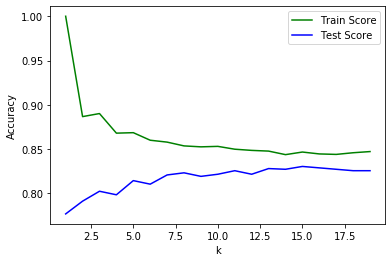

In [39]:
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [40]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8531
Train score: 0.8216


### Decision Tree Classifier

In [41]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0,max_depth=1)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.769
Accuracy on test set: 0.755


In [42]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.769
Accuracy on test set: 0.755


### SVC

In [43]:
clf1 = SVC(kernel = 'linear', C = 100)
clf1.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
clf1.coef_

array([[ 1.46731061e-02,  5.85479672e-03,  2.08398620e-03,
         2.73539186e+01,  1.03917520e+00,  3.84365267e-02,
         2.97514584e-03,  4.35485407e-03,  7.74493699e-04,
         0.00000000e+00, -5.73306196e-03, -2.37143164e-03,
         0.00000000e+00, -6.79922916e-01,  3.49224393e-01,
         3.42172836e-01, -7.25124458e-01, -2.67517539e-01,
        -1.20477740e-01, -3.56333553e-01,  1.38886761e-01,
        -5.35312069e-01,  4.52808444e-01,  4.55956532e-01,
         3.53108506e-01,  4.56252466e-01, -6.80032922e-01,
         4.62054536e-01,  3.54256724e-01, -1.43064667e+00,
        -5.35312069e-01,  1.38886761e-01,  4.52808444e-01,
         4.56252466e-01,  4.62054536e-01,  4.55956532e-01,
        -7.04371304e-01,  1.40799289e+00,  1.92354830e+00,
        -7.05619616e-01, -7.10475682e-01, -5.04252253e-01,
        -7.06822332e-01, -1.00484059e-03,  0.00000000e+00,
         3.81289894e-04,  1.09860832e-02, -6.56214847e-03,
        -2.65658995e-03, -2.60306448e-03, -1.02932913e-0

In [45]:
clf1.score(X_train, y_train)

0.8528

In [46]:
clf1.score(X_test, y_test)

0.816

In [47]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 3750   size of test set: 1250
Best score: 0.83
Best parameters: {'C': 10, 'gamma': 0.1}


## Cross-Validation

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

scores = cross_val_score(logreg, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.84092726 0.844      0.82225781]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validation scores: [0.82423435 0.848      0.84666667 0.85066667 0.82643525]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.84


### Stratified k-Fold Cross-Validation

In [51]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [52]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, X_train, y_train, cv=kfold)))

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validation scores:
[0.8392 0.8464 0.8248]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Project 2

### Voting Classifier

In [53]:
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

LogisticRegression 0.7936
KNeighborsClassifier 0.7752


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.7528


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.7848


In [54]:
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

LogisticRegression 0.7936
KNeighborsClassifier 0.7752


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.7528


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.7856


## Bagging and Pasting

### Decision Tree

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth = 1)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [56]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7824


In [57]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.80
Test score: 0.78


In [58]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.7976


#### Graphs cannot be visualized as the data set contains 108 dimensions here

## Pasting

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth = 1)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0, oob_score=False)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [60]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7824


In [61]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.80
Test score: 0.78


In [62]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.7976


### Random Forests

In [63]:
dt_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

In [64]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [66]:
np.sum(y_pred == y_pred_rf ) / len(y_pred)  # almost identical predictions

0.9336

### Pasting

In [67]:
dt_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)

In [68]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)


In [70]:
np.sum(y_pred == y_pred_rf ) / len(y_pred)  # almost identical predictions

0.9424

### K-Neighbours

In [71]:
from sklearn.neighbors import KNeighborsClassifier

dt_clf = KNeighborsClassifier(10)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

In [72]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.80
Test score: 0.78


### Pasting

In [73]:
from sklearn.neighbors import KNeighborsClassifier

dt_clf = KNeighborsClassifier(10)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)

In [74]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.80
Test score: 0.78


## AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [76]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ada_clf = AdaBoostClassifier(RandomForestClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators='warn',
                        

## Gradient Boosting

In [77]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
gbrt_slow = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.838


In [80]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.859
Accuracy on test set: 0.830


In [81]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.826
Accuracy on test set: 0.804


# PCA

## KNeighborsClassifier

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_train)
X2E = pca.fit_transform(X_test)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X2D, y_train)
    train_score_array.append(knn.score(X2D, y_train))
    test_score_array.append(knn.score(X2E, y_test))
    

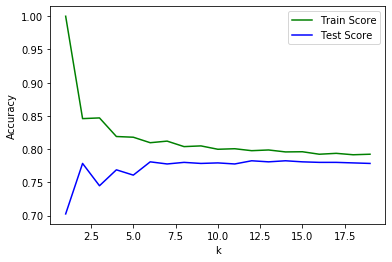

In [84]:
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [85]:
knn = KNeighborsClassifier(6)
knn.fit(X2D, y_train)
print('Train score: {:.4f}'.format(knn.score(X2D, y_train)))
print('Train score: {:.4f}'.format(knn.score(X2E, y_test)))

Train score: 0.8096
Train score: 0.7808


In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X2D = pca.fit_transform(X_train)
X2E = pca.fit_transform(X_test)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X2D, y_train)
    train_score_array.append(knn.score(X2D, y_train))
    test_score_array.append(knn.score(X2E, y_test))

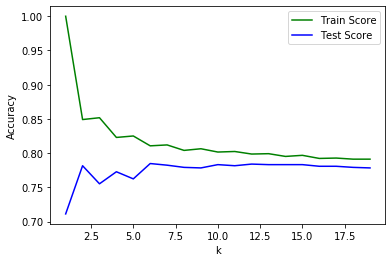

In [88]:
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [89]:
knn = KNeighborsClassifier(6)
knn.fit(X2D, y_train)
print('Train score: {:.4f}'.format(knn.score(X2D, y_train)))
print('Train score: {:.4f}'.format(knn.score(X2E, y_test)))

Train score: 0.8107
Train score: 0.7848


##### Here PCA helps in getting better scores when compared to models without PCA

## Decision Tree Classifier

In [90]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0,max_depth=2)

dtree.fit(X2D, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X2D, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X2E, y_test)))

Accuracy on training set: 0.821
Accuracy on test set: 0.810


##### Here PCA helps in getting better scores when compared to models without PCA

## Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

scores = cross_val_score(logreg, X2D, y_train)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.82094325 0.8152     0.80784628]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
scores = cross_val_score(logreg, X2D, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.81624501 0.816      0.82533333 0.808      0.80640854]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [93]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.81


##### Here PCA helps in getting better average accuracy scores when compared to models without PCA

### Stratified k-Fold Cross-Validation

In [94]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [95]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, X2D, y_train, cv=kfold)))

Cross-validation scores:
[0.8192 0.8256 0.8056]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### Here PCA helps in getting better average accuracy scores when compared to models without PCA

## Kernel SVM

In [96]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

C = [0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['rbf']

param_grid = dict(C=C, kernel=kernel)

SVM=GridSearchCV(SVC(gamma ='scale'), param_grid, cv = 5, iid = False)

SVM.fit(X_train,y_train)

y_pred = SVM.predict(X_test)
print("rbf Kernel SVM best parameters without PCA.{}".format(SVM.best_params_))

rbf Kernel SVM best parameters without PCA.{'C': 100, 'kernel': 'rbf'}


In [97]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['rbf']

param_grid = dict(C=C, kernel=kernel)

SVM=GridSearchCV(SVC(gamma ='scale'), param_grid, cv = 5, iid = False)

SVM.fit(X2D,y_train)

y_pred = SVM.predict(X2E)
print("rbf Kernel SVM best parameters with PCA.{}".format(SVM.best_params_))

rbf Kernel SVM best parameters with PCA.{'C': 10, 'kernel': 'rbf'}


####  Here it is clear that using PCA gives better parameters

In [ ]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['poly']

param_grid = dict(C=C, kernel=kernel)

SVM=GridSearchCV(SVC(gamma ='scale'), param_grid, cv = 5, iid = False)

SVM.fit(X_train,y_train)

y_pred = SVM.predict(X_test)
print("poly Kernel SVM best parameters without PCA.{}".format(SVM.best_params_))

In [104]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['poly']

param_grid = dict(C=C, kernel=kernel)

SVM=GridSearchCV(SVC(gamma ='scale'), param_grid, cv = 5, iid = False)

SVM.fit(X2D,y_train)

y_pred = SVM.predict(X2E)
print("poly Kernel SVM best parameters with PCA.{}".format(SVM.best_params_))

poly Kernel SVM best parameters with PCA.{'C': 100, 'kernel': 'poly'}


## Deep Learning - Classification

In [98]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [99]:
model = Sequential()
model.add(Dense(12, input_dim=108, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [100]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [101]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)




Epoch 1/150





3750/3750 [==============================] - 2s 557us/step - loss: 3.7136 - acc: 0.7696
Epoch 2/150
3750/3750 [==============================] - 1s 244us/step - loss: 3.7136 - acc: 0.7696
Epoch 3/150
3750/3750 [==============================] - 1s 239us/step - loss: 3.7136 - acc: 0.7696
Epoch 4/150
3750/3750 [==============================] - 1s 242us/step - loss: 3.7136 - acc: 0.7696
Epoch 5/150
3750/3750 [==============================] - 1s 244us/step - loss: 3.7136 - acc: 0.7696
Epoch 6/150
3750/3750 [==============================] - 1s 238us/step - loss: 3.7136 - acc: 0.7696
Epoch 7/150
3750/3750 [==============================] - 1s 238us/step - loss: 3.7136 - acc: 0.7696
Epoch 8/150
3750/3750 [==============================] - 1s 230us/step - loss: 3.7136 - acc: 0.7696
Epoch 9/150
3750/3750 [==============================] - 1s 239us/step - loss: 3.7136 - acc: 0.7696
Epoch 10/150
3750/3750 [==============================] - ETA: 0s - loss: 3.6893 - acc: 0.77

3750/3750 [==============================] - 1s 225us/step - loss: 3.7136 - acc: 0.7696
Epoch 66/150
3750/3750 [==============================] - 1s 225us/step - loss: 3.7136 - acc: 0.7696
Epoch 67/150
3750/3750 [==============================] - 1s 226us/step - loss: 3.7136 - acc: 0.7696
Epoch 68/150
3750/3750 [==============================] - 1s 226us/step - loss: 3.7136 - acc: 0.7696
Epoch 69/150
3750/3750 [==============================] - 1s 224us/step - loss: 3.7136 - acc: 0.7696
Epoch 70/150
3750/3750 [==============================] - 1s 221us/step - loss: 3.7136 - acc: 0.7696
Epoch 71/150
3750/3750 [==============================] - 1s 223us/step - loss: 3.7136 - acc: 0.7696
Epoch 72/150
3750/3750 [==============================] - 1s 228us/step - loss: 3.7136 - acc: 0.7696
Epoch 73/150
3750/3750 [==============================] - 1s 236us/step - loss: 3.7136 - acc: 0.7696
Epoch 74/150
3750/3750 [==============================] - 1s 235us/step - loss: 3.7136 - acc: 0.7696
Epo

3750/3750 [==============================] - 1s 224us/step - loss: 3.7136 - acc: 0.7696
Epoch 146/150
3750/3750 [==============================] - 1s 229us/step - loss: 3.7136 - acc: 0.7696
Epoch 147/150
3750/3750 [==============================] - 1s 228us/step - loss: 3.7136 - acc: 0.7696
Epoch 148/150
3750/3750 [==============================] - 1s 234us/step - loss: 3.7136 - acc: 0.7696
Epoch 149/150
3750/3750 [==============================] - 1s 234us/step - loss: 3.7136 - acc: 0.7696
Epoch 150/150
3750/3750 [==============================] - 1s 232us/step - loss: 3.7136 - acc: 0.7696


In [102]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1250/1250 [==============================] - 0s 105us/step

acc: 75.52%


In [103]:
y_predict = model.predict(X_test)
y_predict

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)